In [48]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math 

data break down

In [49]:
btc_hist_data = pd.read_excel("1\\Bitcoin Historical Data.xlsx").replace([',','%'],'')
btc_hist_data = btc_hist_data.iloc[::-1]

Date = btc_hist_data["Date"]
btc_close_price = btc_hist_data['Price']
btc_low_price = btc_hist_data["Low"]
btc_high_price = btc_hist_data["High"]
btc_open_price = btc_hist_data["Open"]
btc_vol_price = btc_hist_data["Vol."]
btc_vol_price = btc_vol_price.str.replace('K','')
btc_chg_price = btc_hist_data["Change %"]


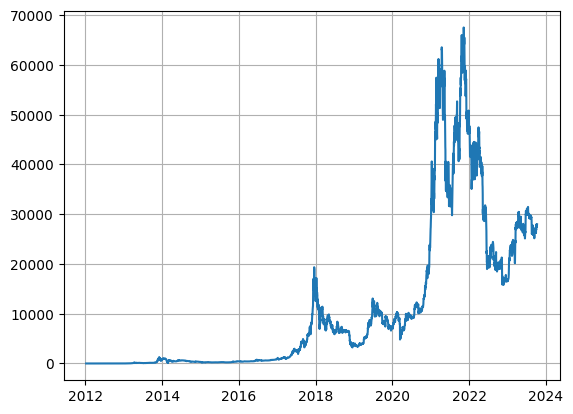

In [62]:
fig =plt.figure(1)
plt.plot(Date,btc_open_price.values)
plt.grid()
plt.show()

log of BTC  price

In [51]:
btc_close_price = btc_close_price.to_numpy()
btc_open_price = btc_open_price.to_numpy()
btc_low_price = btc_low_price.to_numpy()
btc_high_price = btc_high_price.to_numpy()

In [54]:
log_close_price =np.zeros(len(btc_close_price))
log_high_price =np.zeros(len(btc_close_price))
log_low_price =np.zeros(len(btc_close_price))
log_open_price =np.zeros(len(btc_close_price))

for i in range(len(btc_close_price)):
    log_close_price[i] = math.log10(btc_close_price[i])
    log_high_price[i] = math.log10(btc_high_price[i])
    log_low_price[i] = math.log10(btc_low_price[i])
    log_open_price[i] = math.log10(btc_open_price[i])
    



OHLC/4 of BTC price
HL/2 of BTC price
OC/2 of BTC price

In [59]:
ohlc = (log_close_price + log_high_price + log_low_price + log_open_price)/4
HL = (log_high_price + log_low_price)/2
OC = (log_close_price + log_open_price)/2

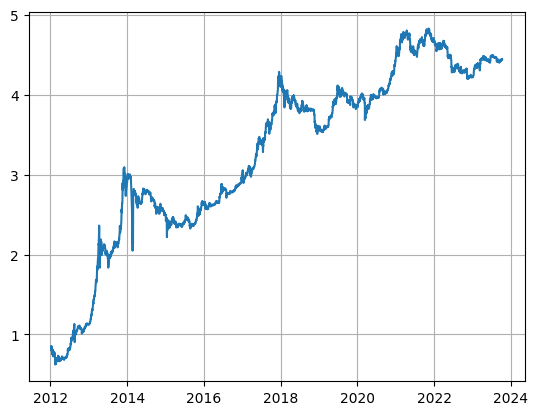

In [61]:
fig =plt.figure(2)
plt.plot(Date,log_close_price)

plt.grid()
plt.show()

 RSI = 100 – [100 ÷ ( 1 + (Average Gain During Up Periods ÷ Average Loss During Down Periods ))]

In [80]:
def RS(pair , period):
    """
    if (period == NaN):
        period = 14
    if (pair == NaN):
        pair = log_close_price
    """
    gain = 0
    loss = 0 
    rs =np.zeros(len(pair))
    for i in reversed(range(period,len(pair))):
        for j in range(0,period):
            if pair[i-j] >= 0:
                gain = gain + pair[i-j]
            else:
                loss = loss + pair[i-j]

        rs[i] = gain/loss
    return rs

In [81]:
rs =RS(btc_chg_price,14)

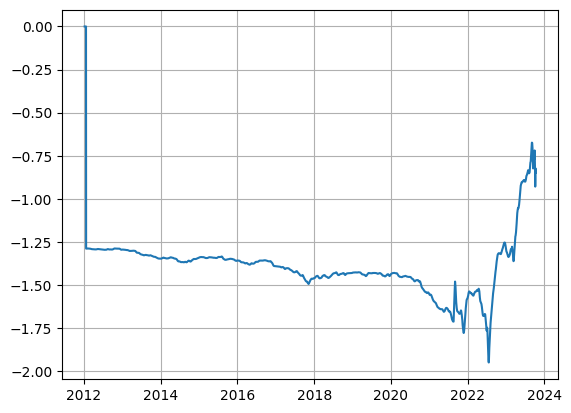

In [82]:
fig =plt.figure(3)
plt.plot(Date,rs)

plt.grid()
plt.show()

In [83]:
def RSI(pair,period):
    """
    if (period == NaN):
        period = 14
    if (pair == NaN):
        pair = log_close_price
    """
    rsi = np.zeros(len(pair))
    rs = RS(pair , period)
    for i in reversed(range(period,len(pair))):
        rsi[i] = 100 - (100 / ( 1 + rs[i]))
    return rsi

In [84]:
rsi = RSI(btc_chg_price,14)

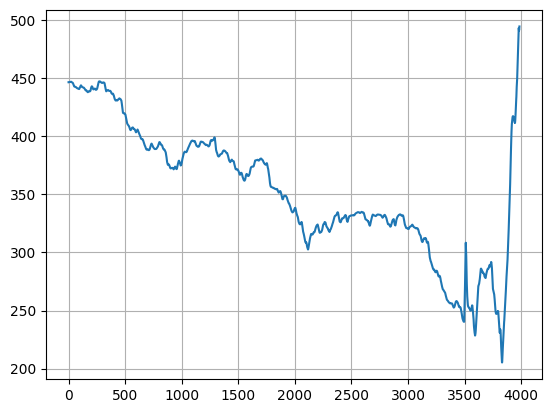

In [89]:
fig =plt.figure(4)
plt.plot(rsi[15:4000])

plt.grid()
plt.show()